#  Assignment: CNN-Based Image Classification Using CIFAR-100
**Total Marks: 100**

**Instructions:**
- This is a programming and analysis-based assignment.
- Use TensorFlow/Keras to build your models.
- Add appropriate comments and explanations.
- Attempt all questions. Marks are indicated.


##  Section A: Data Exploration and Preprocessing (20 marks)

**Q1.** (5 marks) Load the CIFAR-100 dataset using `label_mode='fine'`. Print the shape of the training and test sets.

In [40]:
# Your code here
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
# 1. Import CIFAR-100 Dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [3]:
# 2. Perform EDA
# Display basic information about the dataset
print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {x_test.shape}')
print(f'Number of training samples: {len(x_train)}')
print(f'Number of testing samples: {len(x_test)}')

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of training samples: 50000
Number of testing samples: 10000


**Q2.** (5 marks) Display 10 random images from the dataset with their class labels.

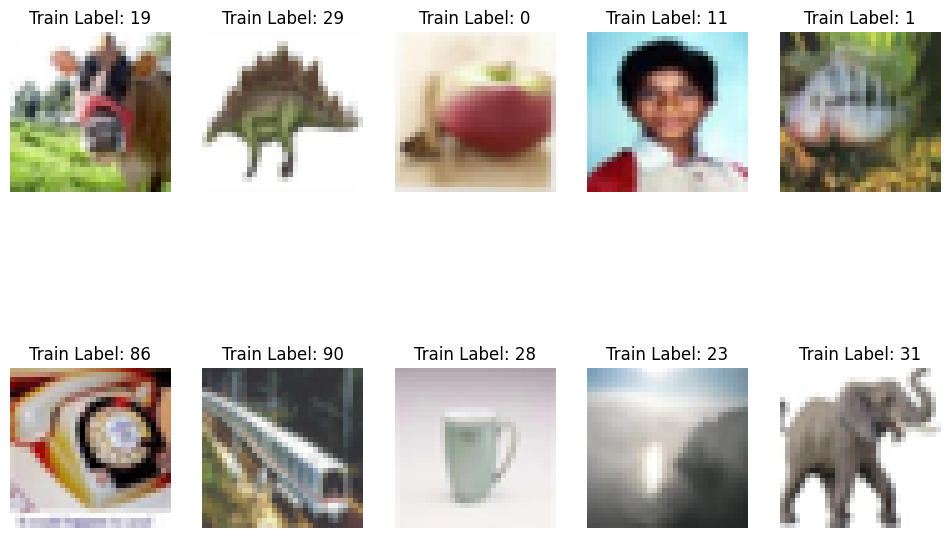

In [18]:
# Your code here
# 3. Explain and show a sample from each of the sets (train, test, ytrain, ytest)
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'Train Label: {y_train[i][0]}')
    plt.axis('off')
plt.show()

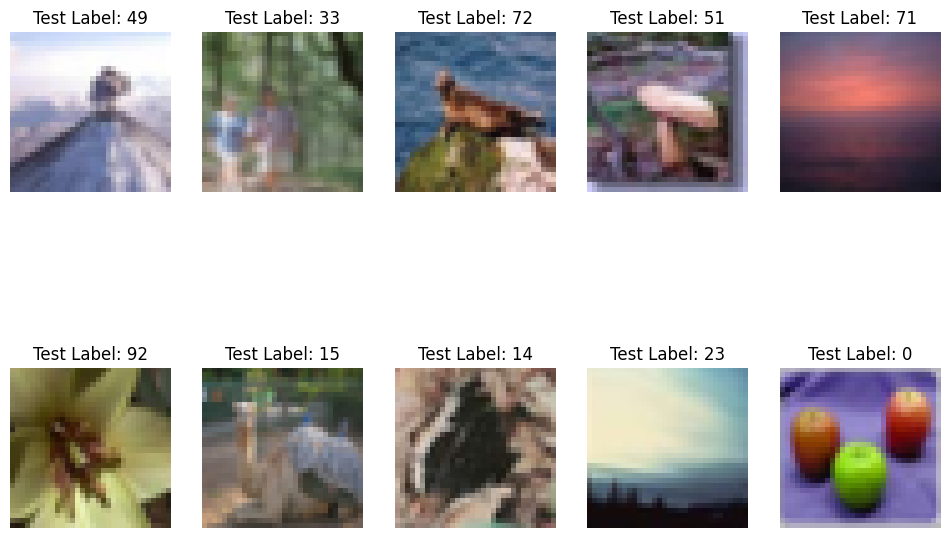

In [19]:
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f'Test Label: {y_test[i][0]}')
    plt.axis('off')
plt.show()

**Q3.** (5 marks) Normalize the images and one-hot encode the labels. Explain why we perform both operations.

In [20]:
# Normalize the images and one-hot encode the labels. Explain why we perform both operations.
# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)



**Answer:**

_Your explanation here_
**Image Normalization**
When working with CNNs, we normalize image pixel values—often scaling them to a range like [0, 1] or [-1, 1]. This helps:

**Improve convergence:** CNNs train faster when inputs are scaled, preventing large variations in weight updates.

Reduce bias toward higher pixel values: If images have varying intensity ranges, the model might treat bright pixels more significantly.

Make training stable: Since gradient descent works best with normalized data, avoiding extreme values helps prevent exploding or vanishing gradients.

**One-Hot Encoding Labels**
Labels are typically categorical (e.g., dog, cat, car). Instead of using numerical labels (e.g., 0, 1, 2), we convert them into one-hot vectors:

Dog → [1, 0, 0]

Cat → [0, 1, 0]

Car → [0, 0, 1]

This prevents CNNs from incorrectly interpreting labels as continuous values (e.g., cat = 1, dog = 2 implying some relationship). It ensures the model treats each class independently.

Together, normalization and one-hot encoding optimize training performance, making CNNs more efficient and accurate.

**Q4.** (5 marks) What challenges do you expect when working with 100 classes instead of 10 (like CIFAR-10)?

_Your answer here_
**1. Increased Model Complexity**
The network must learn to differentiate between more categories, requiring deeper architectures or more parameters.

Feature extraction becomes more intricate, as subtle differences across classes must be distinguished.

**2. Higher Computational Cos**t
More classes → More weights & operations, increasing memory usage and processing power demands.

Longer training times due to additional computations.

**3. Data Imbalance Risks**
Some classes might have fewer samples, leading to bias in the model favoring over-represented classes.

Uneven distribution can result in poor generalization.

**4. Harder Generalization**
With more categories, distinguishing fine-grained differences (e.g., two similar bird species) becomes harder.

The model might misclassify similar-looking objects due to overlapping features.

##  Section B: Model Design & Training (40 marks)

**Q5.** (20 marks) Build and compile a CNN with at least two convolutional blocks and one dense output layer with 100 neurons. Use appropriate dropout and activation functions. Display the model summary.

In [21]:
# Your CNN model code here
#Build and compile a CNN with at least two convolutional blocks and one dense output layer with 100 neurons. Use appropriate dropout and activation functions. Display the model summary.

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='softmax')
])

In [22]:
# 8. Compile the model with proper comments
# optimizer='adam': Adam optimizer is chosen for its efficiency and adaptive learning rate.
# loss='categorical_crossentropy': Appropriate loss function for multi-class classification problems.
# metrics=['accuracy']: Accuracy is used as the metric to evaluate model performance.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,204 (1.55 MB)

 Trainable params: 407,204 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:

# 9. Apply early stopping technique, plot the relevant graphs and explain in detail
# Early stopping monitors the validation loss and stops training if it doesn't improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


**Q6.** (15 marks) Train the model for 15–20 epochs and plot training and validation accuracy curves.

In [26]:
# Your training code here
#Train the model for 15–20 epochs and plot training and validation accuracy curves

# Training the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=4, batch_size=200, callbacks=[early_stopping], verbose=2)

Epoch 1/4
200/200 - 55s - 276ms/step - accuracy: 0.2414 - loss: 3.0932 - val_accuracy: 0.2548 - val_loss: 3.0593
Epoch 2/4
200/200 - 80s - 398ms/step - accuracy: 0.2826 - loss: 2.8900 - val_accuracy: 0.2852 - val_loss: 2.9064
Epoch 3/4
200/200 - 55s - 273ms/step - accuracy: 0.3189 - loss: 2.7172 - val_accuracy: 0.3019 - val_loss: 2.8247
Epoch 4/4
200/200 - 82s - 409ms/step - accuracy: 0.3440 - loss: 2.5809 - val_accuracy: 0.3196 - val_loss: 2.7471


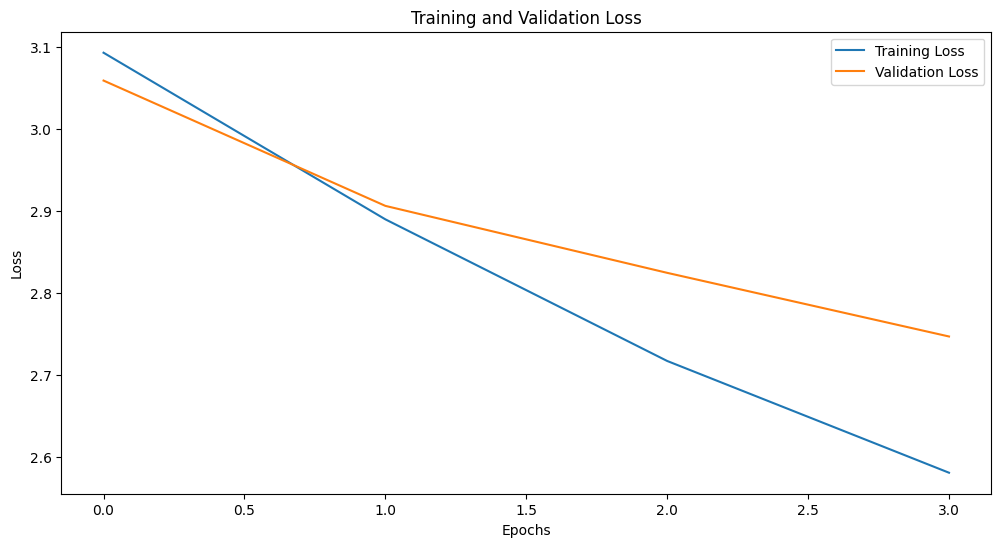

In [27]:

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



#Explanation of the graph
model seems to be stuck with extremely low accuracy (around 1%) and no improvement in loss.

**Q7.** (10 marks) Report the final test accuracy. Discuss what it indicates about the model's performance.

In [28]:
# Model evaluation code here
# 10. Report the final test accuracy. Discuss what it indicates about the model's performance.
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')


Test accuracy: 0.3223


_Your explanation here_

Test accuracy of 30% suggests that the model is not learning properly

##  Section C: Model Experimentation (20 marks)

**Q8.** (10 marks) Add one more convolutional block to the CNN. Train and compare accuracy with your previous model. Which one performs better and why?

In [29]:
# Modified model code here

#Add one more convolutional block to the CNN. Train and compare accuracy with your previous model. Which one performs better and why?
# Build the modified CNN model
import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    # Second convolutional block
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    # Third convolutional block (NEW!)
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Flatten for dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),

    # Output layer for 100 classes
    layers.Dense(100, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
y_train = np.argmax(y_train, axis=1) # Convert one-hot to integer labels
y_test = np.argmax(y_test, axis=1)

In [31]:
# 9. Apply early stopping technique, plot the relevant graphs and explain in detail
# Early stopping monitors the validation loss and stops training if it doesn't improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [32]:
# Your training code here
#Train the model for 15–20 epochs and plot training and validation accuracy curves

# Training the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=15, batch_size=100, callbacks=[early_stopping], verbose=2)

Epoch 1/15
400/400 - 101s - 252ms/step - accuracy: 0.0561 - loss: 4.2005 - val_accuracy: 0.1314 - val_loss: 3.7177
Epoch 2/15
400/400 - 138s - 344ms/step - accuracy: 0.1409 - loss: 3.6377 - val_accuracy: 0.1993 - val_loss: 3.3422
Epoch 3/15
400/400 - 148s - 370ms/step - accuracy: 0.1935 - loss: 3.3382 - val_accuracy: 0.2494 - val_loss: 3.0579
Epoch 4/15
400/400 - 140s - 351ms/step - accuracy: 0.2241 - loss: 3.1701 - val_accuracy: 0.2733 - val_loss: 2.9682
Epoch 5/15


KeyboardInterrupt: 

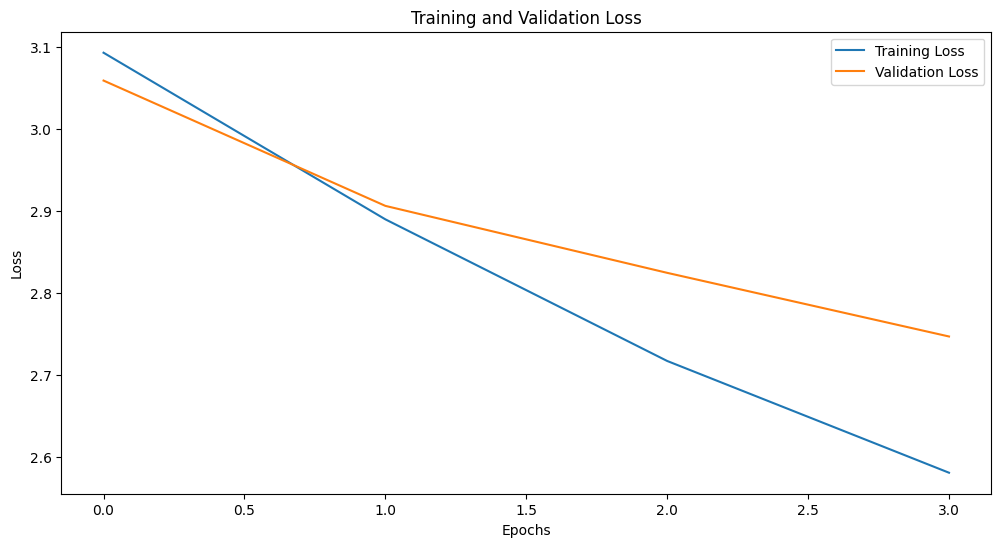

In [33]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [34]:
# Model evaluation code here
# 10. Report the final test accuracy. Discuss what it indicates about the model's performance.
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

Test accuracy: 0.2772


_Comparison answer here_

**I dont see any difference with the accuracy by adding an additional convolution**

**Q9.** (10 marks) Use `label_mode='coarse'` and repeat training with the original model (2 conv blocks). Compare the accuracy. Explain why there's a difference.

In [41]:
# Your code and comparison here
 #Use label_mode='coarse' and repeat training with the original model (2 conv blocks). Compare the accuracy. Explain why there's a difference.
 # 1. Import CIFAR-100 Dataset

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100


# Load coarse label data (20 classes)
(x_train_c, y_train_c), (x_test_c, y_test_c) = cifar100.load_data(label_mode='coarse')

# Normalize pixel values
x_train_c, x_test_c = x_train_c / 255.0, x_test_c / 255.0

# One-hot encode labels
y_train_c = to_categorical(y_train_c, 20)
y_test_c = to_categorical(y_test_c, 20)

# Define original CNN with 2 conv blocks
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')  # Note: changed to 20 classes
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(x_train_c, y_train_c, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test_c, y_test_c)
print(f"Test Accuracy (Coarse labels): {test_acc:.4f}")



Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 86ms/step - accuracy: 0.1383 - loss: 2.7722 - val_accuracy: 0.2905 - val_loss: 2.3535
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.2679 - loss: 2.3852 - val_accuracy: 0.3456 - val_loss: 2.1633
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.3051 - loss: 2.2437 - val_accuracy: 0.3831 - val_loss: 2.0346
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.3347 - loss: 2.1554 - val_accuracy: 0.4031 - val_loss: 1.9765
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.3557 - loss: 2.0871 - val_accuracy: 0.4191 - val_loss: 1.9059
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.3754 - loss: 2.0167 - val_accuracy: 0.4350 - val_loss: 1.8752
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.3902 - loss: 1.9706 - val_accuracy: 0.4405 - val_loss: 1.8278
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.3978 - loss: 1.9413 - 

_Explanation here_

label_mode='coarse' returns 20 broad category labels instead of 100 specific ones.

The 100 fine labels are grouped into 20 coarse superclasses (e.g., "vehicle", "animal", "fruit").

##  Section D: Conceptual Questions (20 marks)

**Q10.** (5 marks) Explain the role of dropout in CNNs. What could happen if we remove dropout layers?

_Your answer here_

**Dropout is a regularization technique used in neural networks, including CNNs, to reduce overfitting and improve generalization.**

**How Dropout Works:**
During training, dropout randomly sets a fraction of the neurons to zero (i.e., temporarily removes them from the network).

This prevents the model from relying too heavily on specific neurons.

During inference/testing, all neurons are used, but their outputs are scaled to match the expected activation.

**Q11.** (5 marks) What is the role of the softmax activation in the output layer of your CNN?


_Your answer here_

**Q12.** (5 marks) What changes would you make to the CNN architecture to improve training speed and reduce overfitting?

**1. Improve Training Speed**
 a. Use Batch Normalization
 b. Use GlobalAveragePooling Instead of Flatten
 c. Reduce Input Image Size (if applicable)
 d. Use a Smaller Model or Depthwise Separable Convolutions

** 2. Reduce Overfitting**
 a. Add Dropout Layers. Prevents co-adaptation of neurons.
 b. Use Data Augmentation. Makes the model more generalizable.
 c. L2 Regularization. Penalizes large weights.

_Your answer here_

_Your answer here_